# REGRESIÓN LOGÍSTICA PARA REVISIÓN DE SCORES

About Dataset
🧠 Conjunto de Datos de Clasificación de Estilo de Vida y Salud
Este conjunto de datos contiene información detallada sobre el estilo de vida y datos biométricos de 100,000 personas. El objetivo es predecir la probabilidad de tener una enfermedad en función de los hábitos, métricas de salud, datos demográficos e indicadores psicológicos.

📦 Resumen del Conjunto de Datos

Filas: 100,000 individuos

Columnas: 40 características + 1 objetivo

Variable Objetivo: target → Clasificación binaria:

saludable

con enfermedad

Desbalanceado: ~70% saludable, ~30% con enfermedad

Tipos de Datos: Numéricos, categóricos, ordinales

🎯 Definición de la Variable Objetivo
La columna objetivo indica si una persona ha sido diagnosticada con una determinada enfermedad o no. La clasificación se basa en indicadores médicos y de estilo de vida derivados del perfil del individuo.

## REGRESIÓN LOGÍSTICA APLICADA LUEGO DE APLICAR IMPUTACIÓN A TRAVÉS DE LA MEDIA


🔍 Valores nulos:
survey_code                     0
age                             0
gender                          0
height                          0
weight                          0
bmi                             0
bmi_estimated                   0
bmi_scaled                      0
bmi_corrected                   0
waist_size                      0
blood_pressure                  0
heart_rate                      0
cholesterol                     0
glucose                         0
insulin                         0
sleep_hours                     0
sleep_quality                   0
work_hours                      0
physical_activity               0
daily_steps                  8329
calorie_intake                  0
sugar_intake                    0
alcohol_consumption         42387
smoking_level                   0
water_intake                    0
screen_time                     0
stress_level                    0
mental_health_score             0
mental_health_support         

C:\Users\Luis D Peñaranda\AppData\Local\Temp\ipykernel_6876\3966161480.py:84: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


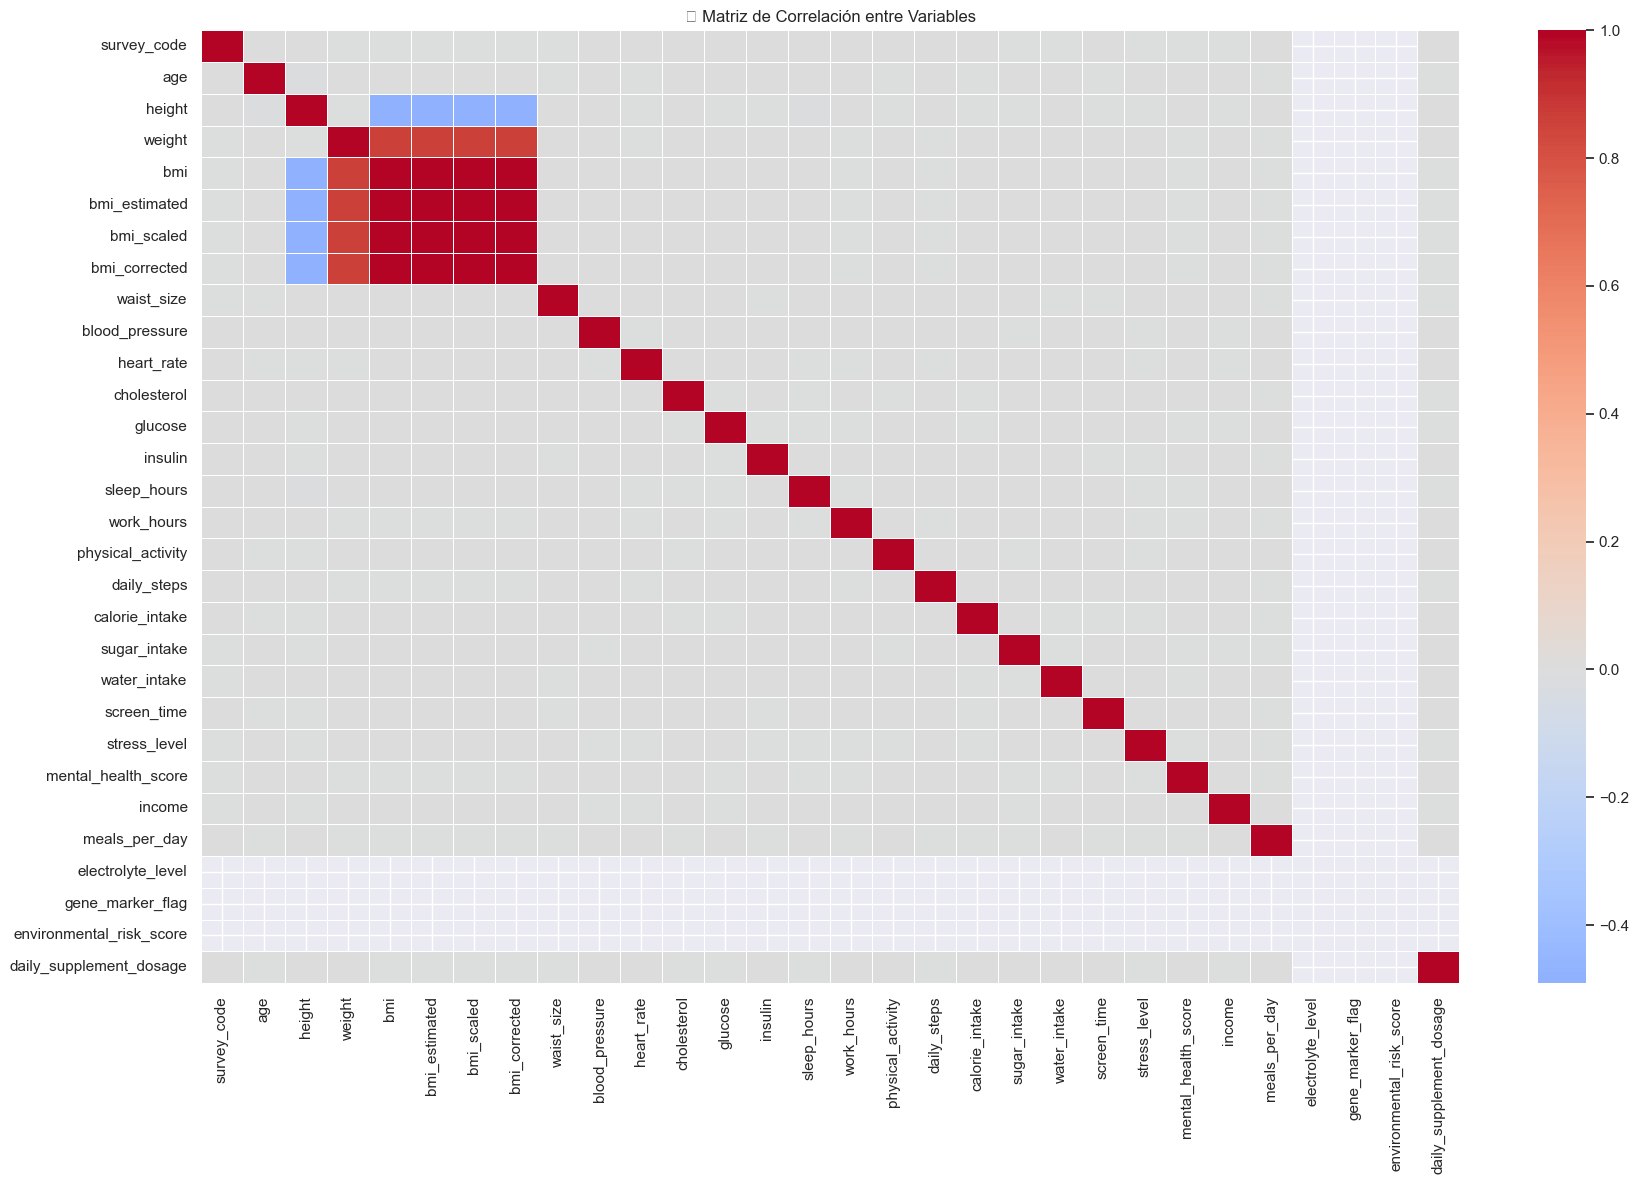

Columnas con nulos en X: ['daily_steps', 'income', 'gene_marker_flag']
Total de nulos por columna:
 survey_code                 0
age                         0
height                      0
weight                      0
bmi                         0
                           ..
job_type_Service            0
job_type_Tech               0
job_type_Unemployed         0
caffeine_intake_Moderate    0
pet_owner_Yes               0
Length: 66, dtype: int64

✅ Accuracy: 0.4987

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

    diseased       0.30      0.50      0.38      5981
     healthy       0.70      0.50      0.58     14019

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.58      0.50      0.52     20000



C:\Users\Luis D Peñaranda\AppData\Local\Temp\ipykernel_6876\3966161480.py:127: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from current font.
  plt.tight_layout()
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


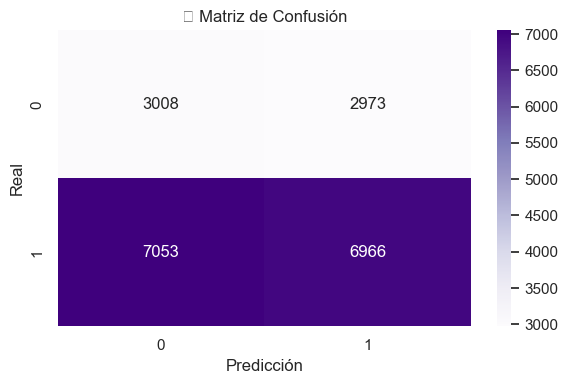

In [1]:
# 📦 Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# 🎨 Estilo visual
sns.set(style="darkgrid")

# 📁 Cargar datos
df = pd.read_csv("C:\Machine_Learning\jbook_ml2025\docs\datos\health_lifestyle_classification.csv")  # Reemplaza con tu archivo

# ✅ Separar variables numéricas y categóricas
num_cols = [
    'age', 'bmi', 'blood_pressure', 'cholesterol', 'heart_rate',
    'glucose', 'insulin', 'calorie_intake', 'sugar_intake',
    'screen_time', 'stress_level', 'mental_health_score'
]

cat_cols = [
    'gender', 'marital_status', 'diet_type', 'occupation',
    'sleep_quality', 'mental_health_support', 'exercise_type',
    'device_usage', 'healthcare_access', 'insurance',
    'family_history', 'sunlight_exposure'
]

# ✅ Filtra columnas categóricas que sí existen
cat_cols = [col for col in cat_cols if col in df.columns]

# 🔧 Imputar valores nulos
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# 🧹 Verifica valores faltantes
print("\n🔍 Valores nulos:")
print(df.isnull().sum())

# ✅ Separar variables numéricas y categóricas
num_cols = [
    'age', 'bmi', 'blood_pressure', 'cholesterol', 'heart_rate',
    'glucose', 'insulin', 'calorie_intake', 'sugar_intake',
    'screen_time', 'stress_level', 'mental_health_score'
]

cat_cols = [
    'gender', 'marital_status', 'diet_type', 'occupation',
    'sleep_quality', 'mental_health_support', 'exercise_type',
    'device_usage', 'healthcare_access', 'insurance',
    'family_history', 'sunlight_exposure'
]

# 🔧 Rellenar o eliminar valores nulos
#df = df.dropna()  # Simple para empezar
# 🔧 Rellenar o eliminar valores nulos

# ⚠️ Ajustar lista de columnas categóricas según las que quedan en el DataFrame
# ⚠️ Ajustar lista de columnas categóricas según las que quedan en el DataFrame
# ⚠️ Ajustar lista de columnas categóricas según las que quedan en el DataFrame
cat_cols = [col for col in cat_cols if col in df.columns]

# Añade las columnas tipo objeto que faltan
extra_cat_cols = ['alcohol_consumption', 'smoking_level', 'education_level', 'job_type', 'caffeine_intake', 'pet_owner']
cat_cols += [col for col in extra_cat_cols if col in df.columns and col not in cat_cols]


# 🔢 One-hot encoding para categóricas
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 📊 Matriz de correlación
# 📊 Matriz de correlación (solo columnas numéricas)
plt.figure(figsize=(18, 12))
corr = df_encoded.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, linewidths=0.5)
plt.title("🔗 Matriz de Correlación entre Variables")
plt.tight_layout()
plt.show()

# 🎯 Variable objetivo
y = df_encoded["target"]
X = df_encoded.drop("target", axis=1)

# Verifica columnas con nulos después de la imputación
null_cols = X.columns[X.isnull().any()].tolist()
print("Columnas con nulos en X:", null_cols)
print("Total de nulos por columna:\n", X.isnull().sum())

# Imputación final para asegurar que no haya NaN en X
final_imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(final_imputer.fit_transform(X), columns=X.columns)

# 🔍 Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧠 División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# 📈 Modelo con regularización más fuerte
model = LogisticRegression(max_iter=1000, class_weight='balanced', C=0.5)
model.fit(X_train, y_train)

# 📊 Predicción y evaluación
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 🔍 Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("🔬 Matriz de Confusión")
plt.tight_layout()
plt.show()

## REGRESIÓN LOGÍSTICA APLICADA LUEGO DE IMPUTACIÓN POR KNN

### Aplicamos balanceo con SMOTE (Synthetic Minority Over-sampling Technique) e imputación con KNN

In [2]:
!pip install imbalanced-learn

Acceso denegado.


In [3]:

from imblearn.over_sampling import SMOTE


🔍 Valores nulos:
survey_code                     0
age                             0
gender                          0
height                          0
weight                          0
bmi                             0
bmi_estimated                   0
bmi_scaled                      0
bmi_corrected                   0
waist_size                      0
blood_pressure                  0
heart_rate                      0
cholesterol                     0
glucose                         0
insulin                         0
sleep_hours                     0
sleep_quality                   0
work_hours                      0
physical_activity               0
daily_steps                  8329
calorie_intake                  0
sugar_intake                    0
alcohol_consumption         42387
smoking_level                   0
water_intake                    0
screen_time                     0
stress_level                    0
mental_health_score             0
mental_health_support         

C:\Users\Luis D Peñaranda\AppData\Local\Temp\ipykernel_6876\4073858583.py:87: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


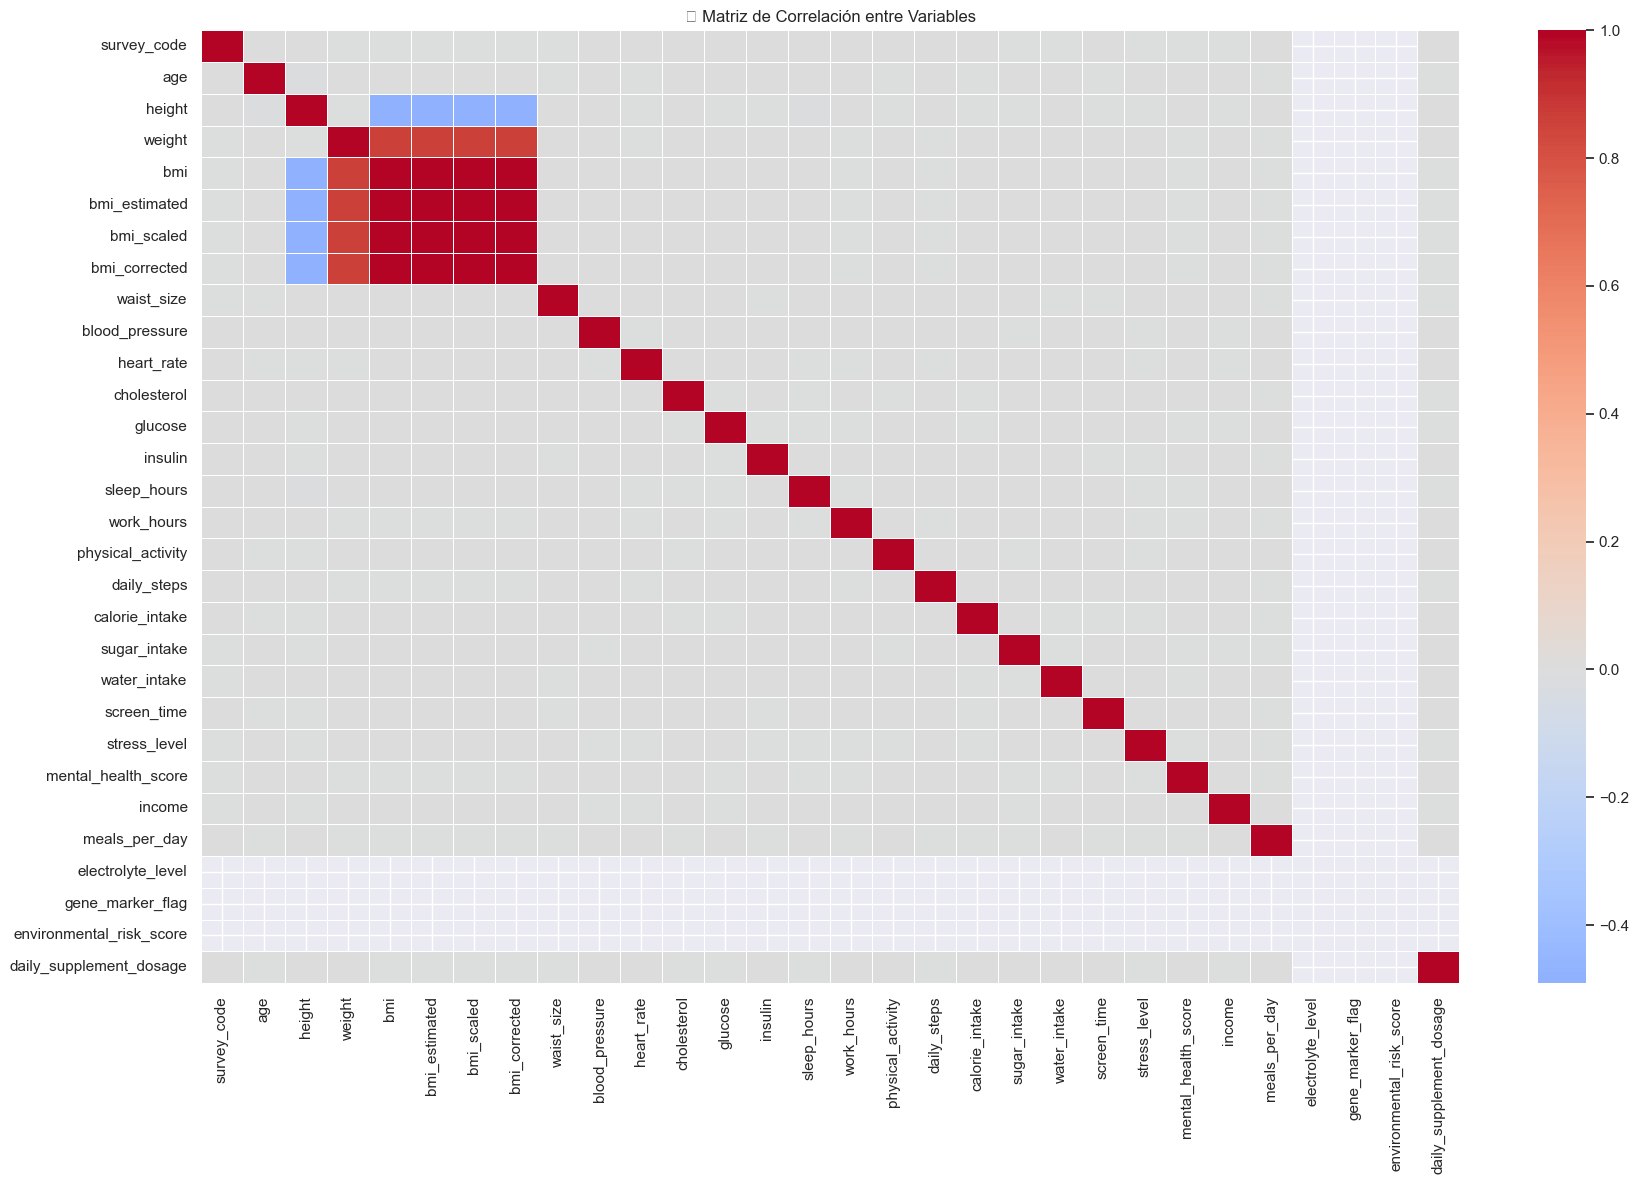

Columnas con nulos en X: ['daily_steps', 'income', 'gene_marker_flag']
Total de nulos por columna:
 survey_code                 0
age                         0
height                      0
weight                      0
bmi                         0
                           ..
job_type_Service            0
job_type_Tech               0
job_type_Unemployed         0
caffeine_intake_Moderate    0
pet_owner_Yes               0
Length: 66, dtype: int64

✅ Accuracy: 0.51045

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

    diseased       0.30      0.48      0.37      5981
     healthy       0.70      0.52      0.60     14019

    accuracy                           0.51     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.58      0.51      0.53     20000


✅ Accuracy: 0.49935

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

    diseased       0.30      0.50      0.38      5981
     heal

C:\Users\Luis D Peñaranda\AppData\Local\Temp\ipykernel_6876\4073858583.py:148: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from current font.
  plt.tight_layout()
C:\Users\Luis D Peñaranda\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


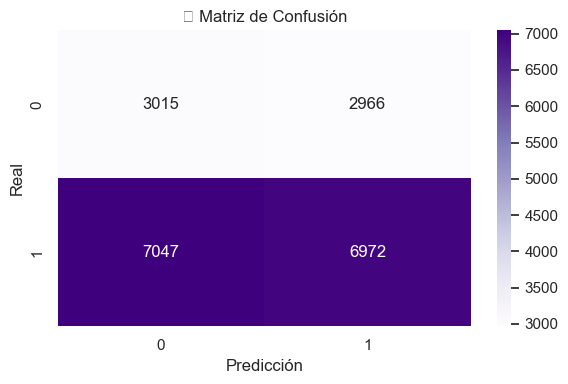

In [4]:
# 📦 Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve, auc


# 🎨 Estilo visual
sns.set(style="darkgrid")

# 📁 Cargar datos
df = pd.read_csv("C:\Machine_Learning\jbook_ml2025\docs\datos\health_lifestyle_classification.csv")  # Reemplaza con tu archivo

# ✅ Separar variables numéricas y categóricas
num_cols = [
    'age', 'bmi', 'blood_pressure', 'cholesterol', 'heart_rate',
    'glucose', 'insulin', 'calorie_intake', 'sugar_intake',
    'screen_time', 'stress_level', 'mental_health_score'
]

cat_cols = [
    'gender', 'marital_status', 'diet_type', 'occupation',
    'sleep_quality', 'mental_health_support', 'exercise_type',
    'device_usage', 'healthcare_access', 'insurance',
    'family_history', 'sunlight_exposure'
]

# ✅ Filtra columnas categóricas que sí existen
cat_cols = [col for col in cat_cols if col in df.columns]

# 🔧 Imputar valores nulos
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# 🧹 Verifica valores faltantes
print("\n🔍 Valores nulos:")
print(df.isnull().sum())

# ✅ Separar variables numéricas y categóricas
num_cols = [
    'age', 'bmi', 'blood_pressure', 'cholesterol', 'heart_rate',
    'glucose', 'insulin', 'calorie_intake', 'sugar_intake',
    'screen_time', 'stress_level', 'mental_health_score'
]

cat_cols = [
    'gender', 'marital_status', 'diet_type', 'occupation',
    'sleep_quality', 'mental_health_support', 'exercise_type',
    'device_usage', 'healthcare_access', 'insurance',
    'family_history', 'sunlight_exposure'
]

# 🔧 Rellenar o eliminar valores nulos
#df = df.dropna()  # Simple para empezar
# 🔧 Rellenar o eliminar valores nulos

# ⚠️ Ajustar lista de columnas categóricas según las que quedan en el DataFrame
# ⚠️ Ajustar lista de columnas categóricas según las que quedan en el DataFrame
# ⚠️ Ajustar lista de columnas categóricas según las que quedan en el DataFrame
cat_cols = [col for col in cat_cols if col in df.columns]

# Añade las columnas tipo objeto que faltan
extra_cat_cols = ['alcohol_consumption', 'smoking_level', 'education_level', 'job_type', 'caffeine_intake', 'pet_owner']
cat_cols += [col for col in extra_cat_cols if col in df.columns and col not in cat_cols]


# 🔢 One-hot encoding para categóricas
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 📊 Matriz de correlación
# 📊 Matriz de correlación (solo columnas numéricas)
plt.figure(figsize=(18, 12))
corr = df_encoded.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, linewidths=0.5)
plt.title("🔗 Matriz de Correlación entre Variables")
plt.tight_layout()
plt.show()

# 🎯 Variable objetivo
y = df_encoded["target"]
X = df_encoded.drop("target", axis=1)

# Verifica columnas con nulos después de la imputación
null_cols = X.columns[X.isnull().any()].tolist()
print("Columnas con nulos en X:", null_cols)
print("Total de nulos por columna:\n", X.isnull().sum())

from sklearn.impute import KNNImputer

# Imputación por KNN
knn_imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(knn_imputer.fit_transform(X), columns=X.columns)

# 🔍 Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧠 División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)



# ⚖️ Balanceo de clases en el set de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 📈 Modelo con regularización más fuerte
model = LogisticRegression(max_iter=1000, class_weight='balanced', C=0.5)
model.fit(X_train_bal, y_train_bal)

# 📊 Predicción y evaluación
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 📈 Modelo con regularización más fuerte
model = LogisticRegression(max_iter=1000, class_weight='balanced', C=0.5)
model.fit(X_train, y_train)

# 📊 Predicción y evaluación
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 🔍 Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("🔬 Matriz de Confusión")
plt.tight_layout()
plt.show()

## Análisis

Con base en los resultados, el Accuracy del modelo de regresión al aplicar imputación por la media es infimamente menor al Accuracy al aplicar la imputación por KNN. Debido a esto, considerando el elevado costo computacional de KNN y su mínima diferencia, podemos concluir que el método más adecuado para un modelo de regresión logística como el aplicado es la imputación por la media. 

**1. Accuracy bajo (~0.50)**
El modelo apenas supera el azar. Esto indica que no está logrando distinguir bien entre "healthy" y "diseased", probablemente por el desbalance de clases y/o falta de información relevante.

**2. Precision y Recall desbalanceados**
Para la clase diseased:
Precision baja (0.30): Muchas predicciones positivas son incorrectas.
Recall moderado (0.48): El modelo detecta menos de la mitad de los casos reales.
Para la clase healthy:
Precision aceptable (0.70): La mayoría de los positivos predichos son correctos.
Recall bajo (0.52): El modelo no detecta todos los casos reales.

**3. F1-score bajo en ambas clases**
El F1-score, que balancea precision y recall, es bajo para ambas clases, lo que indica que el modelo no logra un buen equilibrio entre ambos.

**4. Macro y Weighted Average cercanos a 0.5**
Esto confirma que el modelo no está aprendiendo patrones útiles y que el desbalance de clases afecta negativamente el desempeño.

## Conclusión Final

1. Ni la imputación por KNN ni el balanceo con SMOTE han logrado mejorar significativamente el desempeño del modelo.
2. El modelo sigue teniendo dificultades para identificar correctamente la clase minoritaria ("diseased"). Es necesario probar otros enfoques: mejorar la selección de variables, probar otros algoritmos, ajustar hiperparámetros o revisar la calidad de los datos.
